Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.6238 - accuracy: 0.8450
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.9055
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3099 - accuracy: 0.9141
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2924 - accuracy: 0.9186
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2821 - accuracy: 0.9215
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2752 - accuracy: 0.9233
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2698 - accuracy: 0.9244
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2655 - accuracy: 0.9258
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.9271
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.2652 - accuracy: 0.9266

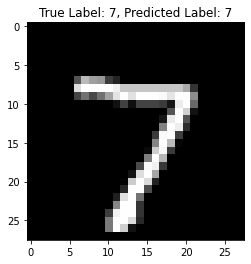

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((60000, 28 * 28)).astype('float32') / 255.0
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Fitting linear classifier
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(28 * 28,)))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=100, epochs=10)

# Evaluate accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make prediction
prediction = model.predict(np.array([X_test[0]], dtype=float))
predicted_label = np.argmax(prediction)

print("Prediction:", predicted_label)
print("True Label:", np.argmax(y_test[0]))

# Display the image
def display(i):
    img = X_test[i].reshape((28, 28))
    plt.title(f'True Label: {np.argmax(y_test[i])}, Predicted Label: {predicted_label}')
    plt.imshow(img, cmap='gray')
    plt.show()

display(0)
